# input data 

In [1]:
%cd /hpc/home/vk93/storage/diffusion-reker

/hpc/group/chatterjee/srikar/storage/diffusion-reker


In [2]:
import pandas as pd
data = pd.read_table('train-val-data.tsv')

In [3]:
data = data[['protein','smiles']]
# data = data.sample(1000)
data = data.reset_index(drop=True)

In [196]:
import pickle

In [5]:
pkl_file_path = 'protein_embedding_dict.pkl'
try:
    with open(pkl_file_path, 'rb') as f:
        protein_embedding_dict = pickle.load(f)
except FileNotFoundError:
    protein_embedding_dict = "File not found. Please make sure the file exists at the specified path."


In [6]:
protein_keys = list(protein_embedding_dict.keys())
subset_data = data[data['protein'].isin(protein_keys)]

In [7]:
import numpy as np
len(np.unique(subset_data['protein']))

359

In [8]:
len(np.unique(subset_data['smiles']))

108722

In [9]:
data = subset_data.copy()

In [10]:
data = data.sample(n=5000)

In [11]:
data = data.reset_index(drop=True)

In [12]:
data['esm_emb'] = data['protein'].map(protein_embedding_dict)

In [13]:
import torch

In [14]:
def process_single_esm_embedding(embedding):
    token_representations = torch.tensor(embedding)
    tokens_len = token_representations.size(0)
    sequence_representation = token_representations[1:tokens_len - 1].mean(0)
    return sequence_representation

In [15]:
data['processed_esm_emb'] = data['esm_emb'].apply(process_single_esm_embedding)

<ipython-input-14-8d352bb74773>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_representations = torch.tensor(embedding)


In [16]:
data = data.drop('esm_emb', axis=1)

# unimol

## install

In [ ]:
!python3 -m venv unimol-dcc-srikar

In [ ]:
!source unimol-dcc-srikar/bin/activate

In [ ]:
## clone repo
!git clone https://github.com/dptech-corp/Uni-Mol.git
%cd Uni-Mol/unimol_tools/unimol_tools

In [ ]:
## download pretrained weights
!wget https://github.com/dptech-corp/Uni-Mol/releases/download/v0.1/mol_pre_all_h_220816.pt
!wget https://github.com/dptech-corp/Uni-Mol/releases/download/v0.1/mol_pre_no_h_220816.pt
!wget https://github.com/dptech-corp/Uni-Mol/releases/download/v0.1/pocket_pre_220816.pt
!wget https://github.com/dptech-corp/Uni-Mol/releases/download/v0.1/mof_pre_no_h_CORE_MAP_20230505.pt
!wget https://github.com/dptech-corp/Uni-Mol/releases/download/v0.1/mp_all_h_230313.pt
!wget https://github.com/dptech-corp/Uni-Mol/releases/download/v0.1/oled_pre_no_h_230101.pt

In [ ]:
!mkdir -p weights
!mv *.pt weights/


In [ ]:
## install
%cd ..

In [ ]:
!pip install addict -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

In [ ]:
!pip install tqdm -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn
!pip install yacs -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn
!pip install transformers -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

In [ ]:
!pip install pymatgen -i https://pypi.tuna.tsinghua.edu.cn/simple/ --trusted-host pypi.tuna.tsinghua.edu.cn

In [ ]:
!python setup.py install --user

In [ ]:
!pip install rdkit

In [ ]:
!ls

In [ ]:
!wget https://github.com/dptech-corp/Uni-Core/releases/download/0.0.3/unicore-0.0.1+cu117torch2.0.0-cp38-cp38-linux_x86_64.whl

In [ ]:
!pip install unicore-0.0.1+cu117torch2.0.0-cp38-cp38-linux_x86_64.whl

## import unimol-repr

In [17]:
from unimol_tools import UniMolRepr

In [18]:
%cd /hpc/home/vk93/storage/diffusion-reker

/hpc/group/chatterjee/srikar/storage/diffusion-reker


In [19]:
data

,protein,smiles,processed_esm_emb
0,MVMQFQGLENPIQISPHCSCTPSGFFMEMMSMKPAKGVLTEQVAGP...,Clc1cccc(Cl)c1-c1noc(C2CC2)c1CO[C@@H]1C[C@@H]2...,"[tensor(0.0067), tensor(-0.0391), tensor(0.050..."
1,MWNATPSEEPGFNLTLADLDWDASPGNDSLGDELLQLFPAPLLAGV...,COc1cccc(c1)-c1ccc(cc1)C(=O)N1CCN([C@@H](C)C1)...,"[tensor(-0.0685), tensor(-0.0077), tensor(-0.0..."
2,MDGWRRMPRWGLLLLLWGSCTFGLPTDTTTFKRIFLKRMPSIRESL...,CC(C)CNC(=O)C(=C)C[C@H](O)[C@H](CC1CCCCC1)NC(=...,"[tensor(0.0923), tensor(-0.0898), tensor(0.004..."
3,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,CC(C)(C)S(=O)(=O)C[C@H](C1CC1)N1[C@@H]([C@H](C...,"[tensor(0.0340), tensor(-0.0593), tensor(-0.00..."
4,MAKQYDSVECPFCDEVSKYEKLAKIGQGTFGEVFKARHRKTGQKVA...,COc1ccc(F)cc1-c1ccnc2[nH]c(cc12)C1CCN(CCN2CCOC...,"[tensor(0.0177), tensor(0.0355), tensor(0.0020..."
...,...,...,...
4995,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,OC(=O)Cc1sc(nc1-c1cccnc1)C(c1ccc(F)cc1)c1ccc(F...,"[tensor(-0.0185), tensor(-0.0335), tensor(0.00..."
4996,MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFER...,C[C@@H]1[C@@H](CCCN1c1cnc(C(N)=O)c(Nc2ccc(cc2)...,"[tensor(0.0227), tensor(-0.0226), tensor(-0.06..."
4997,MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...,COc1cc(C)cc2cc(sc12)-c1c(CN2CCCC(C2)C(N)=O)cn2...,"[tensor(-0.0126), tensor(0.0058), tensor(-0.01..."
4998,MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIA...,CN(C)C(=O)N[C@H]1CC[C@H](CCN2CCc3cccc(Cl)c3C2)CC1,"[tensor(-0.0148), tensor(-0.0211), tensor(-0.0..."


In [20]:
import numpy as np

In [21]:
smiles_list = data['smiles'].to_list()

In [22]:
len(smiles_list)

5000

In [23]:
# y = pd.read_csv('mol_train.csv')['TARGET'].to_list()
clf = UniMolRepr(data_type='molecule', remove_hs=False)
repr_dict = clf.get_repr(smiles_list)

2023-11-27 14:24:56 | unimol_tools/models/unimol.py | 116 | INFO | Uni-Mol(QSAR) | Loading pretrained weights from /hpc/home/vk93/.local/lib/python3.8/site-packages/unimol_tools-1.0.0-py3.8.egg/unimol_tools/weights/mol_pre_all_h_220816.pt
2023-11-27 14:25:02 | unimol_tools/data/conformer.py | 62 | INFO | Uni-Mol(QSAR) | Start generating conformers...
5000it [04:02, 20.63it/s]
2023-11-27 14:29:05 | unimol_tools/data/conformer.py | 66 | INFO | Uni-Mol(QSAR) | Failed to generate conformers for 0.00% of molecules.
2023-11-27 14:29:05 | unimol_tools/data/conformer.py | 68 | INFO | Uni-Mol(QSAR) | Failed to generate 3d conformers for 0.12% of molecules.
100%|██████████| 157/157 [01:30<00:00,  1.74it/s]


In [24]:
unimol_repr_list = np.array(repr_dict['cls_repr'])
# unimol_repr_list = np.array(repr_dict['atomic_reprs'])

## get mol repr

In [25]:
np.save('mol_rep.npy', unimol_repr_list)

In [26]:
repr_dict.keys()

dict_keys(['cls_repr', 'atomic_coords', 'atomic_reprs', 'atomic_symbol'])

In [27]:
len(repr_dict['cls_repr'])

5000

In [28]:
smiles_embedding_dict = {smile: embedding for smile, embedding in zip(smiles_list, unimol_repr_list)}

In [29]:
pd.DataFrame(unimol_repr_list, index=smiles_list).to_csv('mol_rep.csv', header=False)
import pickle
with open('smiles_embedding_dict.pkl', 'wb') as f:
    pickle.dump(smiles_embedding_dict, f)

In [30]:
len(smiles_embedding_dict)

4800

In [31]:
data['processed_unimol'] = data['smiles'].map(smiles_embedding_dict)

In [32]:
data['processed_unimol_emb'] = data['processed_unimol'].apply(lambda x: torch.tensor(x))

In [33]:
data = data.drop('processed_unimol', axis=1)

In [34]:
data.to_csv('data_5000.csv',index=False)

# esm-2

## install/library load

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [ ]:
# data.to_csv('data_1000.csv',index=False)

In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [ ]:
!pip install fair-esm
##setting up ESM
import torch
import esm
esm_model, alphabet = esm.pretrained.esm2_t33_650M_UR50D()
batch_converter = alphabet.get_batch_converter()
esm_model.eval()  # disables dropout for deterministic results
esm_model.cuda() #push model to gpu

In [ ]:
import tqdm as tqdm

In [ ]:
import pickle

## get prot embedding

In [ ]:
from tqdm import tqdm

# Initialize the dictionaries to store embeddings
prot_dict = {}

# Loop over each sequence in the 'sequence' column of the esm_genes DataFrame
for i in tqdm(range(len(data['protein']))):
    prot_seq = data['protein'][i]

    # Prepare input for the ESM model
    batch_labels, batch_strs, batch_tokens = batch_converter([("prot_seq", prot_seq)])

    # Move tokens to GPU if available
    batch_tokens = batch_tokens.cuda() if torch.cuda.is_available() else batch_tokens

    # Compute the length of each sequence (excluding padding tokens)
    batch_lens = (batch_tokens != alphabet.padding_idx).sum(1)

    # Generate embeddings for the sequences
    with torch.no_grad():
        results = esm_model(batch_tokens, repr_layers=[33], return_contacts=False)

    # Remove tokens from GPU if they were placed there
    token_representations = results["representations"][33].cpu() if torch.cuda.is_available() else results["representations"][33]

    del batch_tokens

    # Extract the token embeddings for each sequence (excluding start and end tokens)
    sequence_representations = []
    for j, tokens_len in enumerate(batch_lens):
        sequence_representations.append(token_representations[j, 1 : tokens_len - 1])

    # Store the sequence embeddings in the dictionary with gene_seq as the key
    prot_dict[prot_seq] = sequence_representations[0]


In [ ]:
with open('protein_embedding_dict.pkl', 'wb') as f:
    pickle.dump(prot_dict, f)

In [ ]:
prot_dict['MEEGGDFDNYYGADNQSECEYTDWKSSGALIPAIYMLVFLLGTTGNGLVLWTVFRSSREKRRSADIFIASLAVADLTFVVTLPLWATYTYRDYDWPFGTFFCKLSSYLIFVNMYASVFCLTGLSFDRYLAIVRPVANARLRLRVSGAVATAVLWVLAALLAMPVMVLRTTGDLENTTKVQCYMDYSMVATVSSEWAWEVGLGVSSTTVGFVVPFTIMLTCYFFIAQTIAGHFRKERIEGLRKRRRLLSIIVVLVVTFALCWMPYHLVKTLYMLGSLLHWPCDFDLFLMNIFPYCTCISYVNSCLNPFLYAFFDPRFRQACTSMLCCGQSRCAGTSHSSSGEKSASYSSGHSQGPGPNMGKGGEQMHEKSIPYSQETLVVD'].shape

# dataloader

In [ ]:
import pickle

In [ ]:
pkl_file_path = 'protein_embedding_dict.pkl'
try:
    with open(pkl_file_path, 'rb') as f:
        protein_embedding_dict = pickle.load(f)
except FileNotFoundError:
    protein_embedding_dict = "File not found. Please make sure the file exists at the specified path."


In [ ]:
pkl_file_path = 'smiles_embedding_dict.pkl'
try:
    with open(pkl_file_path, 'rb') as f:
        smiles_embedding_dict = pickle.load(f)
except FileNotFoundError:
    smiles_embedding_dict = "File not found. Please make sure the file exists at the specified path."


In [35]:
import torch
from torch.utils.data import DataLoader, Dataset
import random

class CustomDataset(Dataset):
    def __init__(self, protein_data, smiles_data):
        self.protein_data = protein_data
        self.smiles_data = smiles_data
    
    def __len__(self):
        return len(self.protein_data)

    def __getitem__(self, idx):
        return self.protein_data[idx], self.smiles_data[idx]

def process_esm_embeddings(esm_embeddings_dict):
    processed_embeddings = []
    for key in esm_embeddings_dict:
        token_representations = torch.tensor(esm_embeddings_dict[key])
        tokens_len = token_representations.size(0)
        sequence_representation = token_representations[1:tokens_len - 1].mean(0)
        processed_embeddings.append(sequence_representation)
    return processed_embeddings    

In [36]:
# Process ESM embeddings and prepare datasets
# protein_embeddings = process_esm_embeddings(protein_embedding_dict)
# #protein_embeddings = [torch.tensor(embedding) for embedding in protein_embedding_dict.values()]
# smiles_embeddings = [torch.tensor(embedding) for embedding in smiles_embedding_dict.values()]

protein_embeddings = data['processed_esm_emb']
smiles_embeddings = data['processed_unimol_emb']

assert len(protein_embeddings) == len(smiles_embeddings), "Mismatch in number of protein and SMILES embeddings."

In [37]:
import random

In [38]:
# Create indices and shuffle them
indices = list(range(len(protein_embeddings)))
random.shuffle(indices)

# Split the data
num_train = int(len(indices) * 0.7)
num_val = int(len(indices) * 0.15)

train_indices = indices[:num_train]
val_indices = indices[num_train:num_train + num_val]
test_indices = indices[num_train + num_val:]

def create_dataset(protein_embeddings, smiles_embeddings, indices):
    protein_data = [protein_embeddings[i] for i in indices]
    smiles_data = [smiles_embeddings[i] for i in indices]
    return CustomDataset(protein_data, smiles_data)

# Creating datasets
train_dataset = create_dataset(protein_embeddings, smiles_embeddings, train_indices)
val_dataset = create_dataset(protein_embeddings, smiles_embeddings, val_indices)
test_dataset = create_dataset(protein_embeddings, smiles_embeddings, test_indices)

# Data Loader parameters
batch_size = 4  # You can adjust this based on your GPU memory
shuffle = True  # Typically, we shuffle the training data

In [292]:

# # Write train_indices to a text file
# with open('train_indices.txt', 'w') as file:
#     for index in train_indices:
#         file.write(f"{index}\n")

# # Write val_indices to a text file
# with open('val_indices.txt', 'w') as file:
#     for index in val_indices:
#         file.write(f"{index}\n")

# # Write test_indices to a text file
# with open('test_indices.txt', 'w') as file:
#     for index in test_indices:
#         file.write(f"{index}\n")


In [39]:
# Creating Data Loaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=shuffle)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [40]:
len(train_loader)

875

In [41]:
len(val_loader)

188

In [42]:
len(test_loader)

188

# transition module

In [178]:
import torch
import torch.nn as nn
import torch.nn.functional as F

## variance scheduler

In [179]:
class VarianceSchedule(nn.Module):

    def __init__(self, num_steps=100, s=0.01):
        super().__init__()
        T = num_steps
        t = torch.arange(0, num_steps+1, dtype=torch.float)
        f_t = torch.cos( (np.pi / 2) * ((t/T) + s) / (1 + s) ) ** 2
        alpha_bars = f_t / f_t[0]

        betas = 1 - (alpha_bars[1:] / alpha_bars[:-1])
        betas = torch.cat([torch.zeros([1]), betas], dim=0)
        betas = betas.clamp_max(0.999)

        sigmas = torch.zeros_like(betas)
        for i in range(1, betas.size(0)):
            sigmas[i] = ((1 - alpha_bars[i-1]) / (1 - alpha_bars[i])) * betas[i]
        sigmas = torch.sqrt(sigmas)

        self.register_buffer('betas', betas)
        self.register_buffer('alpha_bars', alpha_bars)
        self.register_buffer('alphas', 1 - betas)
        self.register_buffer('sigmas', sigmas)
        # calculate X0 = sqrt_recip_alphas_cumprod * Xt - sqrt_recipm1_alphas_cumprod * noise
        self.register_buffer('sqrt_recip_alphas_cumprod', torch.sqrt(1. / alpha_bars))
        self.register_buffer('sqrt_recipm1_alphas_cumprod', torch.sqrt(1. / alpha_bars - 1))

        alphas = 1 - betas
        alphas_cumprod = torch.cumprod(alphas, dim=0)
        alphas_cumprod_prev = F.pad(alphas_cumprod[:-1], (1, 0), value = 1.)
        self.posterior_variance = betas * (1. - alphas_cumprod_prev) / (1. - alphas_cumprod)
        self.posterior_log_variance_clipped = torch.log(self.posterior_variance.clamp(min =1e-20))
        self.posterior_mean_coef1 = betas * torch.sqrt(alphas_cumprod_prev) / (1. - alphas_cumprod)
        self.posterior_mean_coef2 = (1. - alphas_cumprod_prev) * torch.sqrt(alphas) / (1. - alphas_cumprod)

    def to(self,device):
        for k, v in self.__dict__.items():
            if isinstance(v, torch.Tensor):
                self.__dict__[k] = v.to(device)



## small molecule continuous transition

In [180]:
class SmallMoleculeContinuousTransition(nn.Module):
    def __init__(self, num_steps, embedding_dim, protein_embedding_dim, noise_mean, noise_std, var_sched_opt={}):
        super().__init__()
        self.embedding_dim = embedding_dim
        self.protein_embedding_dim = protein_embedding_dim
        self.var_sched = VarianceSchedule(num_steps, **var_sched_opt)
        self.noise_mean = noise_mean
        self.noise_std = noise_std

        # Layers for adding noise
        self.add_noise_layer = nn.Linear(embedding_dim, embedding_dim)

        # Denoising layers, now also conditioned on protein embeddings
        self.denoise_layer = nn.Linear(embedding_dim + protein_embedding_dim, embedding_dim)
        self.denoise_mlp = nn.Sequential(
            nn.Linear(embedding_dim + protein_embedding_dim, embedding_dim),
            nn.ReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(embedding_dim, embedding_dim),
        )

    def add_noise(self, molecule_embedding, t):
        # Add noise based on the timestep 't'
        alpha_bar = self.var_sched.alpha_bars[t].unsqueeze(-1)
        noise = torch.randn_like(molecule_embedding) * self.noise_std + self.noise_mean
        noised_embedding = alpha_bar * molecule_embedding + (1 - alpha_bar) * self.add_noise_layer(noise)
        return noised_embedding

    def denoise(self, noised_embedding, protein_embedding, t):
        # Denoise embedding conditioned on protein embeddings
        alpha_bar = self.var_sched.alpha_bars[t].unsqueeze(-1)
        combined_embedding = torch.cat((noised_embedding, protein_embedding), dim=1)
        processed_embedding = self.denoise_layer(combined_embedding)
        mlp_output = self.denoise_mlp(combined_embedding)
        predicted_embedding = alpha_bar * (mlp_output + processed_embedding) + (1 - alpha_bar) * noised_embedding
        return predicted_embedding


# full_dpm and epsilon_net

In [181]:
class EpsilonNet(nn.Module):
    def __init__(self, molecule_embedding_dim, protein_embedding_dim):
        super().__init__()
        self.fc1 = nn.Linear(protein_embedding_dim, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, molecule_embedding_dim)
        self.relu = nn.ReLU()

    def forward(self, protein_embedding):
        x = self.relu(self.fc1(protein_embedding))
        x = self.relu(self.fc2(x))
        epsilon = self.fc3(x)
        return epsilon

In [182]:
class FullDPM(nn.Module):
    def __init__(self, molecule_embedding_dim, protein_embedding_dim, num_steps, noise_mean, noise_std):
        super().__init__()
        self.molecule_embedding_dim = molecule_embedding_dim
        self.protein_embedding_dim = protein_embedding_dim
        self.num_steps = num_steps
        self.epsilon_net = EpsilonNet(molecule_embedding_dim, protein_embedding_dim)
        self.transition_model = SmallMoleculeContinuousTransition(num_steps, molecule_embedding_dim, protein_embedding_dim, noise_mean, noise_std)
    
    def forward(self, protein_embedding, t):
        # Start with noise
        molecule_embedding = torch.randn(protein_embedding.size(0), self.molecule_embedding_dim, device=protein_embedding.device)
        noised_embedding = self.transition_model.add_noise(molecule_embedding, t)
        epsilon = self.epsilon_net(protein_embedding)
        denoised_embedding = self.transition_model.denoise(noised_embedding + epsilon, protein_embedding, t)
        return denoised_embedding

    @torch.no_grad()
    def sample(self, protein_embedding):
        molecule_embedding = torch.randn(protein_embedding.size(0), self.molecule_embedding_dim, device=protein_embedding.device)
        for t in reversed(range(self.num_steps)):
            molecule_embedding = self.forward(protein_embedding, t)
        return molecule_embedding


# design module

In [183]:
class DiffusionProteinToMolecule(nn.Module):
    def __init__(self, cfg, num_protein_features, num_molecule_features):
        super().__init__()
        self.cfg = cfg

        self.diffusion = FullDPM(
            num_molecule_features,
            num_protein_features,
            cfg['num_steps'],
            cfg['noise_mean'],
            cfg['noise_std']
        )

    def forward(self, protein_emb, t=None):
        if t is None:
            t = torch.randint(0, self.cfg['num_steps'], (1,), dtype=torch.long)
        return self.diffusion(protein_emb, t)

    @torch.no_grad()
    def sample(self, protein_emb):
        return self.diffusion.sample(protein_emb)


In [184]:
import numpy as np

In [185]:
import torch
import torch.nn as nn
import torch.optim as optim

# Configuration for the diffusion model
cfg = {
    'num_steps': 100,  # Number of steps in the diffusion process
    'noise_mean': 0.0,  
    'noise_std': 1.0,
}

num_protein_features = 1280  # Example dimension of protein embeddings
num_molecule_features = 512  # Desired dimension of molecule embeddings

# Initialize the model
model = DiffusionProteinToMolecule(cfg, num_protein_features, num_molecule_features)
model.to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))


DiffusionProteinToMolecule(
  (diffusion): FullDPM(
    (epsilon_net): EpsilonNet(
      (fc1): Linear(in_features=1280, out_features=512, bias=True)
      (fc2): Linear(in_features=512, out_features=512, bias=True)
      (fc3): Linear(in_features=512, out_features=512, bias=True)
      (relu): ReLU()
    )
    (transition_model): SmallMoleculeContinuousTransition(
      (var_sched): VarianceSchedule()
      (add_noise_layer): Linear(in_features=512, out_features=512, bias=True)
      (denoise_layer): Linear(in_features=1792, out_features=512, bias=True)
      (denoise_mlp): Sequential(
        (0): Linear(in_features=1792, out_features=512, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.2, inplace=False)
        (3): Linear(in_features=512, out_features=512, bias=True)
      )
    )
  )
)

In [186]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

In [187]:
import os
import sys

# Redirect standard output
sys.stdout = open(os.devnull, 'w')
def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for batch_idx, (protein_emb, true_molecule_emb) in enumerate(train_loader):
        protein_emb = protein_emb.to(device)
        true_molecule_emb = true_molecule_emb.to(device)

        optimizer.zero_grad()
        generated_molecule_emb = model(protein_emb)
        loss = criterion(generated_molecule_emb, true_molecule_emb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

def validate(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for protein_emb, true_molecule_emb in val_loader:
            protein_emb = protein_emb.to(device)
            true_molecule_emb = true_molecule_emb.to(device)
            generated_molecule_emb = model(protein_emb)
            loss = criterion(generated_molecule_emb, true_molecule_emb)
            total_loss += loss.item()
    return total_loss / len(val_loader)


# Training setup
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)  # Adjust learning rate
torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0) # use gradient clipping -- combats exploding gradients
# criterion = torch.nn.CrossEntropyLoss()
# criterion = torch.nn.MSELoss()
criterion = torch.nn.L1Loss()


# Training execution
import matplotlib.pyplot as plt

train_losses = []
val_losses = []

num_epochs = 20

for epoch in range(1, num_epochs + 1):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    val_loss = validate(model, val_loader, criterion, device)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
# Restore standard output to its original state
sys.stdout = sys.__stdout__
    

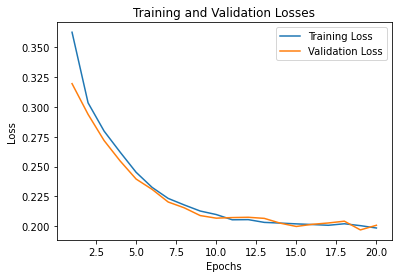

In [188]:
plt.plot(range(1, num_epochs + 1), train_losses, label='Training Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [189]:
empty_pe = []
for protein_emb, molecule_emb in test_loader:
    empty_pe.append(protein_emb)

In [190]:
len(empty_pe)

188

In [191]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch

model.eval()
generated_embeddings = []
ground_truth_embeddings = []

with torch.no_grad():
    for protein_emb, molecule_emb in val_loader:
        protein_emb = protein_emb.to(device)
        molecule_emb = molecule_emb.to(device)
        output = model(protein_emb)
        generated_embeddings.extend(output.cpu().numpy())
        ground_truth_embeddings.extend(molecule_emb.cpu().numpy())

# Convert to numpy arrays
generated_embeddings = np.array(generated_embeddings)
ground_truth_embeddings = np.array(ground_truth_embeddings)
len(ground_truth_embeddings)

750

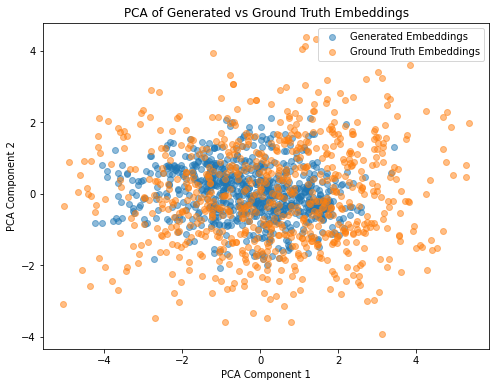

In [192]:
# Run PCA
pca = PCA(n_components=2) # Change to n_components=3 for 3D
combined_embeddings = np.concatenate((generated_embeddings, ground_truth_embeddings))
pca_result = pca.fit_transform(combined_embeddings)

# Split the PCA result back into generated and ground truth
split_point = generated_embeddings.shape[0]
generated_pca = pca_result[:split_point, :]
ground_truth_pca = pca_result[split_point:, :]

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(generated_pca[:, 0], generated_pca[:, 1], label='Generated Embeddings', alpha=0.5)
plt.scatter(ground_truth_pca[:, 0], ground_truth_pca[:, 1], label='Ground Truth Embeddings', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Generated vs Ground Truth Embeddings')
plt.legend()
plt.show()

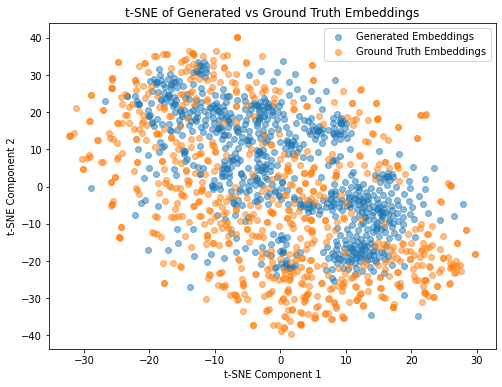

In [193]:
from sklearn.manifold import TSNE

# Running t-SNE on the combined embeddings
tsne = TSNE(n_components=2, random_state=42)  # set random_state for reproducibility
tsne_result = tsne.fit_transform(combined_embeddings)

# Split the t-SNE result back into generated and ground truth embeddings
generated_tsne = tsne_result[:split_point, :]
ground_truth_tsne = tsne_result[split_point:, :]

# Plotting the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(generated_tsne[:, 0], generated_tsne[:, 1], label='Generated Embeddings', alpha=0.5)
plt.scatter(ground_truth_tsne[:, 0], ground_truth_tsne[:, 1], label='Ground Truth Embeddings', alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of Generated vs Ground Truth Embeddings')
plt.legend()
plt.show()


In [194]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(generated_embeddings, ground_truth_embeddings)
cosine_similarities_diag = np.diag(cosine_similarities)
average_cosine_similarity = np.mean(cosine_similarities_diag)

In [195]:
average_cosine_similarity

0.9704699

expanded chemical space pca/tsne

In [318]:
# comparison plot of one protein and its 512 individual features

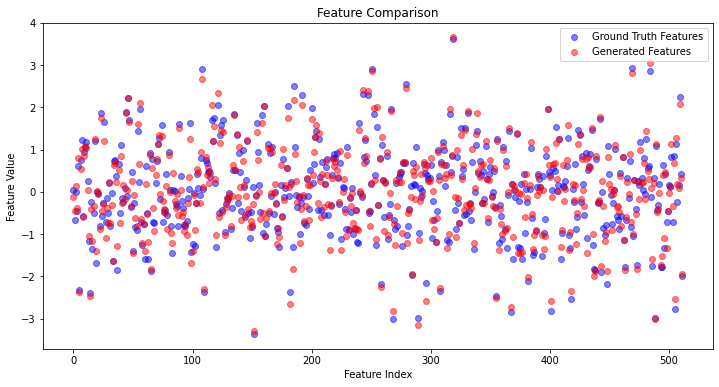

In [319]:
features_range = np.arange(ground_truth_embeddings[0].shape[0])

# Plot each feature of the ground truth against each feature of the generated embeddings
plt.figure(figsize=(12, 6))
plt.scatter(features_range, ground_truth_embeddings[0], c='blue', alpha=0.5, label='Ground Truth Features')
plt.scatter(features_range, generated_embeddings[0], c='red', alpha=0.5, label='Generated Features')
plt.title('Feature Comparison')
plt.xlabel('Feature Index')
plt.ylabel('Feature Value')
plt.legend()
plt.show()

# look-up table decoding scheme

In [270]:
protein_embedding_sequence_dict = {}
for index, row in data.iterrows():
    protein_embedding = row['processed_esm_emb'] 
    protein_sequence = row['protein'] 
    protein_embedding_sequence_dict[tuple(protein_embedding)] = protein_sequence


In [237]:
embedding_smiles_dict = {}
for index, row in data.iterrows():
    embedding = row['processed_unimol_emb'] 
    smiles = row['smiles'] 
    embedding_smiles_dict[tuple(embedding)] = smiles


In [243]:
import numpy as np

def find_closest_embedding(generated_embedding, embedding_smiles_dict):
    closest_smiles = None
    closest_embedding = None
    min_distance = float('inf')

    for ground_truth_embedding, smiles in embedding_smiles_dict.items():
        distance = np.linalg.norm(np.array(ground_truth_embedding) - generated_embedding)
        if distance < min_distance:
            min_distance = distance
            closest_smiles = smiles
            closest_embedding = ground_truth_embedding

    return closest_smiles, min_distance, closest_embedding


In [248]:
generated_embeddings_subset = generated_embeddings[0:5]

In [252]:
# find_closest_embedding(generated_embeddings[0], embedding_smiles_dict)

In [249]:
generated_embeddings_subset

array([[-0.13251042, -0.45946252,  0.12510097, ...,  2.0735383 ,
         0.31425202, -1.934721  ],
       [-0.2060599 , -0.17077297,  0.24289945, ...,  2.016259  ,
         0.524249  , -1.9384128 ],
       [-0.17244926, -0.34380633,  0.5800451 , ...,  2.3491077 ,
         0.383519  , -2.159598  ],
       [-0.47262442, -0.32747936, -0.10217211, ...,  2.2840955 ,
         0.15918472, -1.9951159 ],
       [-0.5772901 , -0.39902294,  0.20645648, ...,  2.350009  ,
         0.30755273, -2.0348275 ]], dtype=float32)

In [256]:
import pandas as pd

# Data lists
decoded_smiles_list = []
min_distance_list = []
ground_truth_smiles_list = []

for generated_embedding in generated_embeddings:
    closest_smiles, min_distance, closest_embedding = find_closest_embedding(generated_embedding, embedding_smiles_dict)
    decoded_smiles_list.append(closest_smiles)
    min_distance_list.append(min_distance)
    ground_truth_smiles_list.append(embedding_smiles_dict[tuple(closest_embedding)])

In [257]:
# Create DataFrame
df = pd.DataFrame({
    'Decoded_SMILES': decoded_smiles_list,
    'Min_Distance': min_distance_list,
    'Ground_Truth_SMILES': ground_truth_smiles_list
})

In [288]:
df = df[['Decoded_SMILES','Min_Distance']]

In [289]:
df

,Decoded_SMILES,Min_Distance
0,CN(C)c1ccc(cn1)-c1cc2nccnc2c(NC[C@H]2CNCCC2(F)...,4.233210
1,Cn1cc(cc(N)c1=O)-c1cccc(c1CO)-n1c(cc2cc(ccc2c1...,4.535190
2,CC(C)c1cc(C(=O)N2Cc3ccc(CN4CCN(C)CC4)cc3C2)c(O...,4.616539
3,COc1ccc(Cn2c(nnc2[C@H](Cc2ccccc2)NC(C)=O)[C@@H...,4.581069
4,NS(=O)(=O)c1ccc(cc1)N1N=C(CC1c1ccc2OCCOc2c1)C(...,3.765682
...,...,...
745,Cc1c(-c2ccnc3c(F)cccc23)c2cc(C)ccc2n1CC(O)=O,3.492570
746,OC(=O)COc1ccc(Cl)cc1[C@H]1N(CCc2ncsc12)C(=O)[C...,3.526263
747,Cc1c(-c2ccnc3c(F)cccc23)c2cc(C)ccc2n1CC(O)=O,3.844205
748,Cn1ccc(Nc2nc(N)cc(n2)-c2cccc(c2CO)-n2ccc3cc(cc...,4.524452


In [290]:
df.to_csv('decoded_look_up_table.csv')

In [286]:
import pandas as p
val_data_lookup = data.iloc[val_indices]

In [293]:
val_data_lookup.reset_index(drop=True, inplace=True)

In [302]:
merged_df = pd.concat([val_data_lookup[['protein','smiles']], df], axis=1)

In [299]:
merged_df.to_csv('decoded_smiles_lookup_protein_seq_ref.csv')

In [306]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools

# Create RDKit molecule objects from the 'smiles' column
merged_df['original_mol'] = [Chem.MolFromSmiles(s) for s in merged_df['smiles']]

# Create RDKit molecule objects from the 'Decoded_SMILES' column
merged_df['decoded_mol'] = [Chem.MolFromSmiles(s) for s in merged_df['Decoded_SMILES']]

# Add molecule columns to the DataFrame using PandasTools for better visualization
PandasTools.AddMoleculeColumnToFrame(merged_df, 'smiles', 'original_mol')
PandasTools.AddMoleculeColumnToFrame(merged_df, 'Decoded_SMILES', 'decoded_mol')


In [308]:
merged_df.to_csv('decoded_smiles_lookup_protein_seq_ref_includes_structures.csv')

In [320]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols

In [321]:
# Function to calculate Tanimoto similarity
def calculate_tanimoto(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    fp1 = FingerprintMols.FingerprintMol(mol1)
    fp2 = FingerprintMols.FingerprintMol(mol2)
    return DataStructs.FingerprintSimilarity(fp1, fp2)

# Apply the function to each row in the dataframe
merged_df['Tanimoto_Similarity'] = merged_df.apply(lambda row: calculate_tanimoto(row['smiles'], row['Decoded_SMILES']), axis=1)
merged_df.head()

,protein,smiles,Decoded_SMILES,Min_Distance,original_mol,decoded_mol,Tanimoto_Similarity
0,MLLSKFGSLAHLCGPGGVDHLPVKILQPAKADKESFEKAYQVGAVL...,C[C@@H]1C[C@H](N)CN(C1)c1ccncc1NC(=O)c1ccc2ccn...,CN(C)c1ccc(cn1)-c1cc2nccnc2c(NC[C@H]2CNCCC2(F)...,4.233210,<rdkit.Chem.rdchem.Mol object at 0x7f16f469f7b0>,<rdkit.Chem.rdchem.Mol object at 0x7f16f43f4eb0>,0.410737
1,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,CC(C)c1nnc2ccc(cn12)-c1ocnc1-c1ccc(F)c(Cl)c1,Cn1cc(cc(N)c1=O)-c1cccc(c1CO)-n1c(cc2cc(ccc2c1...,4.535190,<rdkit.Chem.rdchem.Mol object at 0x7f16f469f820>,<rdkit.Chem.rdchem.Mol object at 0x7f16f43f4e40>,0.461944
2,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,CSc1nc(c([nH]1)-c1ccc(F)cc1)-c1ccnc(NC2CCCCC2C)c1,CC(C)c1cc(C(=O)N2Cc3ccc(CN4CCN(C)CC4)cc3C2)c(O...,4.616539,<rdkit.Chem.rdchem.Mol object at 0x7f16f469f890>,<rdkit.Chem.rdchem.Mol object at 0x7f16f43f4dd0>,0.212732
3,MWNATPSEEPGFNLTLADLDWDASPGNDSLGDELLQLFPAPLLAGV...,CCN(CC)CCN1C(=O)[C@](O)(c2c1cc(cc2C(F)(F)F)C(N...,COc1ccc(Cn2c(nnc2[C@H](Cc2ccccc2)NC(C)=O)[C@@H...,4.581069,<rdkit.Chem.rdchem.Mol object at 0x7f16f469f900>,<rdkit.Chem.rdchem.Mol object at 0x7f16f43f4d60>,0.491976
4,MAPLCPSPWLPLLIPAPAPGLTVQLLLSLLLLVPVHPQRLPRMQED...,NS(=O)(=O)c1cc(C(=O)NC2CCCCC2)c(SCc2ccccc2)cc1Cl,NS(=O)(=O)c1ccc(cc1)N1N=C(CC1c1ccc2OCCOc2c1)C(...,3.765682,<rdkit.Chem.rdchem.Mol object at 0x7f16f469f970>,<rdkit.Chem.rdchem.Mol object at 0x7f16f43f4cf0>,0.361806


In [322]:
merged_df.to_csv('decoded_smiles_lookup_protein_seq_ref_includes_structures_TANIMOTO.csv')

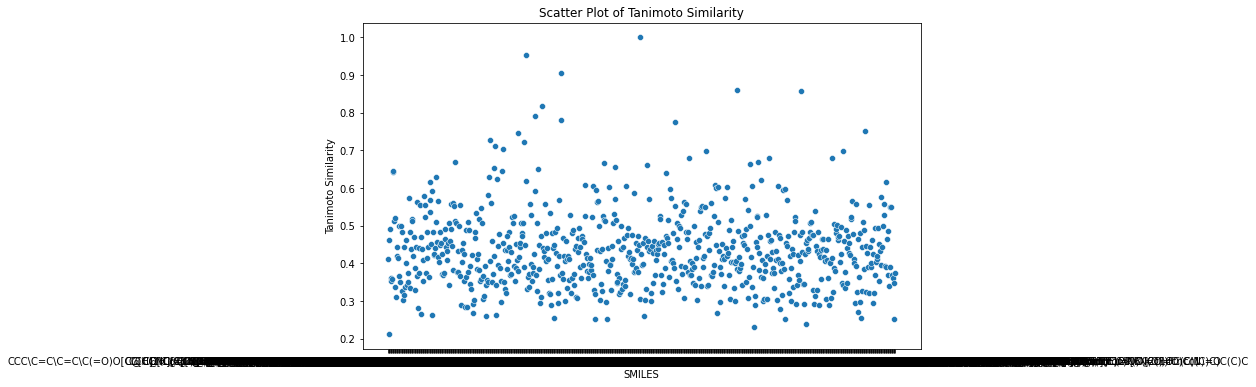

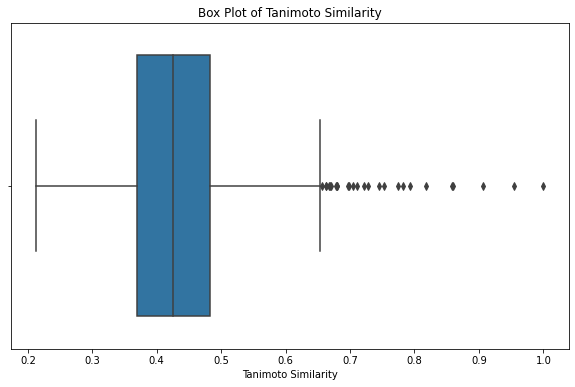

In [324]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='smiles', y='Tanimoto_Similarity')
plt.title('Scatter Plot of Tanimoto Similarity')
plt.xlabel('SMILES')
plt.ylabel('Tanimoto Similarity')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='Tanimoto_Similarity')
plt.title('Box Plot of Tanimoto Similarity')
plt.xlabel('Tanimoto Similarity')
plt.show()

# custom lstm-decoder (levenstein distance)

In [197]:
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

In [198]:
data

,protein,smiles,processed_esm_emb,processed_unimol_emb
0,MVMQFQGLENPIQISPHCSCTPSGFFMEMMSMKPAKGVLTEQVAGP...,Clc1cccc(Cl)c1-c1noc(C2CC2)c1CO[C@@H]1C[C@@H]2...,"[tensor(0.0067), tensor(-0.0391), tensor(0.050...","[tensor(-0.1986), tensor(-0.0581), tensor(0.46..."
1,MWNATPSEEPGFNLTLADLDWDASPGNDSLGDELLQLFPAPLLAGV...,COc1cccc(c1)-c1ccc(cc1)C(=O)N1CCN([C@@H](C)C1)...,"[tensor(-0.0685), tensor(-0.0077), tensor(-0.0...","[tensor(-0.2780), tensor(-0.1134), tensor(-0.2..."
2,MDGWRRMPRWGLLLLLWGSCTFGLPTDTTTFKRIFLKRMPSIRESL...,CC(C)CNC(=O)C(=C)C[C@H](O)[C@H](CC1CCCCC1)NC(=...,"[tensor(0.0923), tensor(-0.0898), tensor(0.004...","[tensor(-0.1039), tensor(-0.7860), tensor(0.21..."
3,MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQKD...,CC(C)(C)S(=O)(=O)C[C@H](C1CC1)N1[C@@H]([C@H](C...,"[tensor(0.0340), tensor(-0.0593), tensor(-0.00...","[tensor(-0.3172), tensor(-0.5562), tensor(0.26..."
4,MAKQYDSVECPFCDEVSKYEKLAKIGQGTFGEVFKARHRKTGQKVA...,COc1ccc(F)cc1-c1ccnc2[nH]c(cc12)C1CCN(CCN2CCOC...,"[tensor(0.0177), tensor(0.0355), tensor(0.0020...","[tensor(-0.2762), tensor(0.0102), tensor(0.008..."
...,...,...,...,...
4995,MSANATLKPLCPILEQMSRLQSHSNTSIRYIDHAAVLLHGLASLLG...,OC(=O)Cc1sc(nc1-c1cccnc1)C(c1ccc(F)cc1)c1ccc(F...,"[tensor(-0.0185), tensor(-0.0335), tensor(0.00...","[tensor(-0.4306), tensor(-0.7254), tensor(-0.0..."
4996,MAAVILESIFLKRSQQKKKTSPLNFKKRLFLLTVHKLSYYEYDFER...,C[C@@H]1[C@@H](CCCN1c1cnc(C(N)=O)c(Nc2ccc(cc2)...,"[tensor(0.0227), tensor(-0.0226), tensor(-0.06...","[tensor(-0.0597), tensor(-0.5574), tensor(0.11..."
4997,MGAPACALALCVAVAIVAGASSESLGTEQRVVGRAAEVPGPEPGQQ...,COc1cc(C)cc2cc(sc12)-c1c(CN2CCCC(C2)C(N)=O)cn2...,"[tensor(-0.0126), tensor(0.0058), tensor(-0.01...","[tensor(-0.3254), tensor(-0.5483), tensor(-0.0..."
4998,MDPLNLSWYDDDLERQNWSRPFNGSDGKADRPHYNYYATLLTLLIA...,CN(C)C(=O)N[C@H]1CC[C@H](CCN2CCc3cccc(Cl)c3C2)CC1,"[tensor(-0.0148), tensor(-0.0211), tensor(-0.0...","[tensor(-0.1672), tensor(-0.3015), tensor(-0.0..."


In [199]:
embeddings = data['processed_unimol_emb'].tolist()
smiles_strings = data['smiles'].tolist()

In [200]:
# Find the maximum length
max_length = max(e.size(0) for e in embeddings)

In [201]:
import torch.nn.functional as F

# Function to pad a tensor to a specific length
def pad_tensor(tensor, length):
    padding_size = length - tensor.size(0)
    if padding_size > 0:
        return F.pad(tensor, (0, 0, 0, padding_size))
    return tensor

# Pad each embedding
padded_embeddings = [pad_tensor(e, max_length) for e in embeddings]
embeddings_tensor = torch.stack(padded_embeddings)


In [202]:
embeddings_tensor.shape

torch.Size([5000, 512])

In [203]:
def build_vocab(smiles_list):
    vocab = set()
    for smiles in smiles_list:
        vocab.update(set(smiles))
    vocab = sorted(vocab)  # Sort for consistency
    vocab_dict = {v: k for k, v in enumerate(vocab, start=1)}  # Start indexing from 1
    vocab_dict['<PAD>'] = 0  # Add a padding token
    return vocab_dict

smiles_vocab = build_vocab(smiles_strings)
vocab_size = len(smiles_vocab)


In [204]:
### tokenize function
def tokenize(smiles, vocab):
    """
    Converts a SMILES string into a list of indices based on the given vocabulary.

    Parameters:
    smiles (str): A SMILES string.
    vocab (dict): A dictionary mapping SMILES characters to indices.

    Returns:
    list: A list of indices representing the SMILES string.
    """
    return [vocab[char] for char in smiles]


In [205]:
sample_smiles = "C(C(=O)O)c1ccccc1"
tokenized_smiles = tokenize(sample_smiles, smiles_vocab)
tokenized_smiles

[18, 2, 18, 2, 15, 24, 3, 24, 3, 30, 7, 30, 30, 30, 30, 30, 7]

In [206]:
# Convert SMILES tokens to a tensor and pad sequences
smiles_tokenized = [tokenize(smiles, smiles_vocab) for smiles in smiles_strings]
max_length = max(len(t) for t in smiles_tokenized)
padded_smiles = [t + [smiles_vocab['<PAD>']] * (max_length - len(t)) for t in smiles_tokenized]
smiles_tensor = torch.tensor(padded_smiles, dtype=torch.long)

# Create a dataset and DataLoader
dataset = TensorDataset(embeddings_tensor, smiles_tensor)
data_loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [207]:
vocab_size

38

In [208]:
smiles_vocab

{'#': 1,
 '(': 2,
 ')': 3,
 '+': 4,
 '-': 5,
 '/': 6,
 '1': 7,
 '2': 8,
 '3': 9,
 '4': 10,
 '5': 11,
 '6': 12,
 '7': 13,
 '8': 14,
 '=': 15,
 '@': 16,
 'B': 17,
 'C': 18,
 'F': 19,
 'H': 20,
 'I': 21,
 'L': 22,
 'N': 23,
 'O': 24,
 'P': 25,
 'S': 26,
 '[': 27,
 '\\': 28,
 ']': 29,
 'c': 30,
 'e': 31,
 'i': 32,
 'l': 33,
 'n': 34,
 'o': 35,
 'r': 36,
 's': 37,
 '<PAD>': 0}

In [209]:
import torch
import torch.nn as nn
import torch.optim as optim

In [210]:
class LSTMDecoder(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, vocab_size, sequence_length):
        super(LSTMDecoder, self).__init__()
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.sequence_length = sequence_length

    def forward(self, embeddings, hidden=None):
        # Repeat embeddings across the sequence length
        repeated_embeddings = embeddings.unsqueeze(1).repeat(1, self.sequence_length, 1)
        lstm_out, hidden = self.lstm(repeated_embeddings)
        outputs = self.fc(lstm_out)
        return outputs, hidden

sequence_length = max_length  # This should match your expected SMILES length
model = LSTMDecoder(embedding_dim=512, hidden_dim=256, vocab_size=40, sequence_length=sequence_length)


In [211]:
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# num_epochs = 10  # Set the number of epochs

# output_list = []
# embeddings_batch_list = []
# smiles_batch_list = []

# for epoch in range(num_epochs):
#     model.train()
#     total_loss = 0
#     for embeddings_batch, smiles_batch in data_loader:
#         embeddings_batch_list.append(embeddings_batch)
#         optimizer.zero_grad()
#         output, _ = model(embeddings_batch) # output shape: [32, 187, 40]
#         output_list.append(output)
#         output = output.transpose(1, 2)  # New shape: [32, 40, 187]
#         smiles_batch_list.append(smiles_batch)
#         loss = criterion(output, smiles_batch)
#         loss.backward()
#         optimizer.step()
#         total_loss += loss.item()
#     print(f'Epoch {epoch}, Loss: {total_loss / len(data_loader)}')


In [212]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

# Assuming 'model' is your neural network model and 'data_loader' is your DataLoader
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50  # Set the number of epochs

losses = []  # List to store loss per epoch

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for embeddings_batch, smiles_batch in data_loader:
        optimizer.zero_grad()
        output, _ = model(embeddings_batch)  # output shape: [32, 187, 40]
        output = output.transpose(1, 2)  # New shape: [32, 40, 187]
        loss = criterion(output, smiles_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    epoch_loss = total_loss / len(data_loader)
    losses.append(epoch_loss)
    print(f'Epoch {epoch}, Loss: {epoch_loss}')

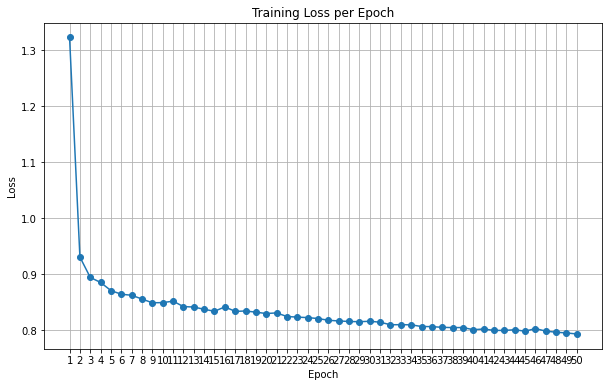

In [213]:
# Plotting the loss after the training loop
plt.figure(figsize=(10, 6))
plt.plot(losses, marker='o', linestyle='-')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(num_epochs), range(1, num_epochs + 1))
plt.grid(True)
plt.show()

In [214]:
# output_list[0].shape

In [215]:
# embeddings_batch_list[0].shape

In [216]:
# embeddings_batch_list[1].shape

In [217]:
# smiles_batch_list[0].shape

In [218]:
ground_truth_embeddings[0].shape

(512,)

In [219]:
smiles_max_length = max_length

In [220]:
device

device(type='cpu')

In [224]:
test_embedding = ground_truth_embeddings[0]

In [225]:
import torch

# Convert the NumPy array to a PyTorch tensor
test_embedding_tensor = torch.tensor(test_embedding, dtype=torch.float32)

# If your model is running on a GPU, you need to move the tensor to the same device
if torch.cuda.is_available():
    test_embedding_tensor = test_embedding_tensor.to('cuda')

In [226]:
test_embedding_tensor.shape

torch.Size([512])

In [227]:
idx_to_smiles = {index: char for char, index in smiles_vocab.items()}

## one sequence at once

In [228]:
def decode_smiles(model, embedding, sequence_length, vocab_size):
    # Ensure embedding is of shape [1, embedding_dim]
    if embedding.dim() == 1:
        embedding = embedding.unsqueeze(0)

    # Process embedding through the model to get output of shape [1, sequence_length, vocab_size]
    model_output, _ = model(embedding, sequence_length)  # Unpack the tuple

    # Decoding the output to a SMILES string
    smiles = ""
    for i in range(sequence_length):
        # Select the most probable character at each position
        char_index = model_output[0, i, :].argmax()
        char = idx_to_smiles[char_index.item()]  # Convert index to SMILES token
        smiles += char

    return smiles

# Assuming test_embedding_tensor is your input embedding tensor
# And assuming 'model' is your trained model
smiles_string = decode_smiles(model, test_embedding_tensor, sequence_length, vocab_size)
print(smiles_string)


In [229]:
smiles_string

'CCCCCCCCccccccccccccccccccccccccccccccccccccccccC<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>'

In [230]:
import pandas as pd
import torch

decoded_smiles = []

for embedding in ground_truth_embeddings:
    # Convert the embedding to a PyTorch tensor and decode it to a SMILES string
    embedding_tensor = torch.tensor(embedding).to(device)  # Assuming 'embedding' is a numpy array or a list
    smiles_string = decode_smiles(model, embedding_tensor, sequence_length, vocab_size)
    decoded_smiles.append(smiles_string)

df_decoded = pd.DataFrame(decoded_smiles, columns=['Decoded_SMILES'])


In [231]:
df_decoded['Decoded_SMILES'][748]

'Oc1ccccccccccccccccccccccccccccccccccccccccccccccccc<PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD><PAD>'

In [233]:
df_decoded.to_csv('decoded_smiles_v1.csv')

In [310]:
df_decoded

,Decoded_SMILES
0,CCCCCCCCcccccccccccccccccccccccccccccccccccccc...
1,Cc1ccccccccccccccccccccccccccccccccccccccccc<P...
2,CC(Ccccccccccccccccccccccccccccccccccccccccccc...
3,CC(Ccc(ccccccccccccccccccccccccccccccccccccccc...
4,CC(==((cccccccccccccccccccccccccccccccccccccc<...
...,...
745,CC(cccccccccccccccccccccccccccccccc<PAD><PAD><...
746,FC(Fccccccccccccccccccc((((((((((((((((())))))...
747,CC(=cccccccccccccccccccccccccccccccc))))))))<P...
748,Oc1ccccccccccccccccccccccccccccccccccccccccccc...
